# GAN

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

Using cuda device


In [2]:
BATCH_SIZE = 64
Z_DIM = 10
HIDDEN_DIM = 64
NB_EPOCHS = 30

## Models architectures

In [3]:
class Discriminator(nn.Module):

    def __init__(self, image_channels=1):
        super().__init__()
        kernel_size = 4
        stride = 2
        self.dicriminate = nn.Sequential(
            # input size: input_channels x 28 x 28
            nn.Conv2d(image_channels, HIDDEN_DIM, kernel_size, stride),
            nn.BatchNorm2d(HIDDEN_DIM),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: HIDDEN_DIM x 13 x 13
            nn.Conv2d(HIDDEN_DIM, HIDDEN_DIM*2, kernel_size, stride),
            nn.BatchNorm2d(HIDDEN_DIM*2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: HIDDEN_DIM*2 x 5 x 5
            nn.Conv2d(HIDDEN_DIM*2, 1, kernel_size, stride),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.dicriminate(x)


class Generator(nn.Module):

    def __init__(self, image_channels=1):
        super().__init__()
        self.generate = nn.Sequential(
            # input size: Z_DIM
            nn.ConvTranspose2d(Z_DIM, HIDDEN_DIM*4, kernel_size=3, stride=2),
            nn.BatchNorm2d(HIDDEN_DIM*4),
            nn.ReLU(inplace=True),
            # state dim: HIDDEN_DIM*4 x 3 x 3
            nn.ConvTranspose2d(HIDDEN_DIM*4, HIDDEN_DIM*2, kernel_size=4, stride=1),
            nn.BatchNorm2d(HIDDEN_DIM*2),
            nn.ReLU(inplace=True),
            # state dim: HIDDEN_DIM*2 x 6 x 6
            nn.ConvTranspose2d(HIDDEN_DIM*2, HIDDEN_DIM, kernel_size=3, stride=2),
            nn.BatchNorm2d(HIDDEN_DIM),
            nn.ReLU(inplace=True),
            # state dim: HIDDEN_DIM x 13 x 13
            nn.ConvTranspose2d(HIDDEN_DIM, image_channels, kernel_size=4, stride=2),
            # state dim: 28 x 28
            nn.Tanh()
        )

    def forward(self, x):
        return self.generate(x)

# disc = Discriminator()
# x0 = train_data[0][0].view(1, 1, 28, 28)
# disc(x0).shape

# gen = Generator()
# x0 = torch.randn(1,10,1,1)
# gen(x0).shape

## Load data (MNIST)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_data = datasets.MNIST(
    root='../data',
    train=True,
    transform=transform
)

test_data = datasets.MNIST(
    root='../data',
    train=False,
    transform=transform
)

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

/d/alecoz/miniconda3/envs/alc/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1635068699003/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Initialize

In [5]:
# Models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
optim_generator = torch.optim.Adam(generator.parameters(), lr=0.0002)
optim_discriminator = torch.optim.Adam(discriminator.parameters())

# Fixed noise used to visualize the progression of the generator
fixed_noise = torch.randn(16, Z_DIM, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

## Train

Epoch [1/30] ------------------
[1/30][0/938]	 Loss D: 1.599	 Loss G: 1.779	 D(x): 0.45	 D(G(z)): 0.54/0.18
[1/30][100/938]	 Loss D: 0.084	 Loss G: 4.437	 D(x): 0.97	 D(G(z)): 0.05/0.02
[1/30][200/938]	 Loss D: 0.036	 Loss G: 4.992	 D(x): 0.98	 D(G(z)): 0.02/0.01
[1/30][300/938]	 Loss D: 0.012	 Loss G: 7.451	 D(x): 0.99	 D(G(z)): 0.00/0.00
[1/30][400/938]	 Loss D: 0.017	 Loss G: 5.585	 D(x): 0.99	 D(G(z)): 0.01/0.00
[1/30][500/938]	 Loss D: 0.004	 Loss G: 6.969	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/30][600/938]	 Loss D: 0.008	 Loss G: 6.669	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/30][700/938]	 Loss D: 0.006	 Loss G: 6.717	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/30][800/938]	 Loss D: 0.011	 Loss G: 7.827	 D(x): 0.99	 D(G(z)): 0.00/0.00
[1/30][900/938]	 Loss D: 0.004	 Loss G: 8.589	 D(x): 1.00	 D(G(z)): 0.00/0.00


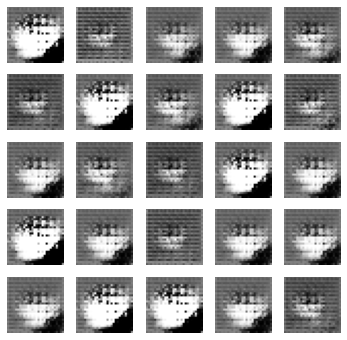

Epoch [2/30] ------------------
[2/30][0/938]	 Loss D: 0.003	 Loss G: 7.805	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][100/938]	 Loss D: 0.003	 Loss G: 6.817	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][200/938]	 Loss D: 0.001	 Loss G: 8.328	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][300/938]	 Loss D: 0.001	 Loss G: 8.101	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][400/938]	 Loss D: 0.002	 Loss G: 7.522	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][500/938]	 Loss D: 0.003	 Loss G: 8.054	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][600/938]	 Loss D: 0.007	 Loss G: 6.291	 D(x): 1.00	 D(G(z)): 0.01/0.00
[2/30][700/938]	 Loss D: 0.006	 Loss G: 8.977	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][800/938]	 Loss D: 0.015	 Loss G: 6.146	 D(x): 1.00	 D(G(z)): 0.01/0.00
[2/30][900/938]	 Loss D: 0.186	 Loss G: 8.944	 D(x): 1.00	 D(G(z)): 0.16/0.00


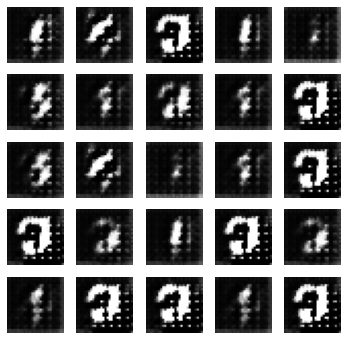

Epoch [3/30] ------------------
[3/30][0/938]	 Loss D: 0.019	 Loss G: 8.528	 D(x): 0.99	 D(G(z)): 0.00/0.00
[3/30][100/938]	 Loss D: 0.008	 Loss G: 8.651	 D(x): 0.99	 D(G(z)): 0.00/0.00
[3/30][200/938]	 Loss D: 0.011	 Loss G: 8.066	 D(x): 0.99	 D(G(z)): 0.00/0.00
[3/30][300/938]	 Loss D: 0.055	 Loss G: 4.639	 D(x): 0.97	 D(G(z)): 0.02/0.03
[3/30][400/938]	 Loss D: 0.047	 Loss G: 9.021	 D(x): 0.97	 D(G(z)): 0.01/0.00
[3/30][500/938]	 Loss D: 0.071	 Loss G: 6.900	 D(x): 0.97	 D(G(z)): 0.02/0.01
[3/30][600/938]	 Loss D: 0.049	 Loss G: 6.300	 D(x): 0.98	 D(G(z)): 0.03/0.01
[3/30][700/938]	 Loss D: 0.053	 Loss G: 4.330	 D(x): 0.99	 D(G(z)): 0.04/0.05
[3/30][800/938]	 Loss D: 0.043	 Loss G: 8.605	 D(x): 0.97	 D(G(z)): 0.01/0.00
[3/30][900/938]	 Loss D: 0.062	 Loss G: 4.644	 D(x): 0.98	 D(G(z)): 0.03/0.04


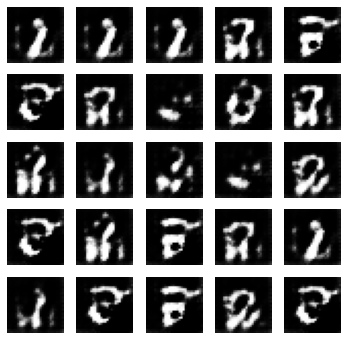

Epoch [4/30] ------------------
[4/30][0/938]	 Loss D: 0.931	 Loss G: 4.963	 D(x): 1.00	 D(G(z)): 0.44/0.04
[4/30][100/938]	 Loss D: 0.254	 Loss G: 5.810	 D(x): 0.87	 D(G(z)): 0.02/0.02
[4/30][200/938]	 Loss D: 0.141	 Loss G: 2.925	 D(x): 0.99	 D(G(z)): 0.09/0.13
[4/30][300/938]	 Loss D: 0.365	 Loss G: 5.238	 D(x): 0.92	 D(G(z)): 0.13/0.05
[4/30][400/938]	 Loss D: 0.047	 Loss G: 6.490	 D(x): 0.99	 D(G(z)): 0.03/0.01
[4/30][500/938]	 Loss D: 0.093	 Loss G: 5.155	 D(x): 0.95	 D(G(z)): 0.02/0.02
[4/30][600/938]	 Loss D: 0.167	 Loss G: 4.481	 D(x): 0.98	 D(G(z)): 0.10/0.04
[4/30][700/938]	 Loss D: 0.155	 Loss G: 3.695	 D(x): 0.93	 D(G(z)): 0.05/0.10
[4/30][800/938]	 Loss D: 0.264	 Loss G: 5.092	 D(x): 0.83	 D(G(z)): 0.02/0.02
[4/30][900/938]	 Loss D: 0.143	 Loss G: 5.043	 D(x): 0.96	 D(G(z)): 0.08/0.03


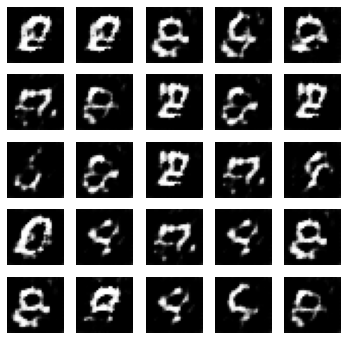

Epoch [5/30] ------------------
[5/30][0/938]	 Loss D: 0.137	 Loss G: 7.810	 D(x): 0.93	 D(G(z)): 0.04/0.01
[5/30][100/938]	 Loss D: 0.288	 Loss G: 4.296	 D(x): 0.95	 D(G(z)): 0.13/0.05
[5/30][200/938]	 Loss D: 0.286	 Loss G: 3.869	 D(x): 0.86	 D(G(z)): 0.04/0.07
[5/30][300/938]	 Loss D: 0.232	 Loss G: 3.238	 D(x): 0.97	 D(G(z)): 0.15/0.10
[5/30][400/938]	 Loss D: 0.748	 Loss G: 3.896	 D(x): 0.63	 D(G(z)): 0.03/0.04
[5/30][500/938]	 Loss D: 0.285	 Loss G: 3.539	 D(x): 0.95	 D(G(z)): 0.16/0.08
[5/30][600/938]	 Loss D: 0.387	 Loss G: 4.136	 D(x): 0.92	 D(G(z)): 0.14/0.09
[5/30][700/938]	 Loss D: 0.363	 Loss G: 5.455	 D(x): 0.82	 D(G(z)): 0.07/0.03
[5/30][800/938]	 Loss D: 1.328	 Loss G: 2.361	 D(x): 0.71	 D(G(z)): 0.31/0.29
[5/30][900/938]	 Loss D: 0.311	 Loss G: 4.242	 D(x): 0.89	 D(G(z)): 0.10/0.06


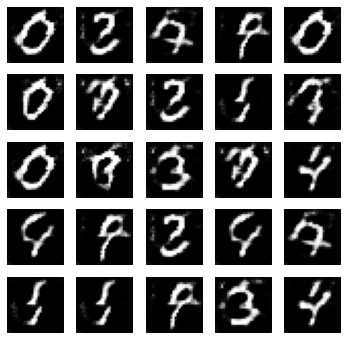

Epoch [6/30] ------------------
[6/30][0/938]	 Loss D: 0.759	 Loss G: 3.850	 D(x): 0.86	 D(G(z)): 0.22/0.14
[6/30][100/938]	 Loss D: 0.579	 Loss G: 4.473	 D(x): 0.77	 D(G(z)): 0.09/0.08
[6/30][200/938]	 Loss D: 0.579	 Loss G: 3.598	 D(x): 0.75	 D(G(z)): 0.11/0.10
[6/30][300/938]	 Loss D: 0.226	 Loss G: 4.131	 D(x): 0.89	 D(G(z)): 0.08/0.05
[6/30][400/938]	 Loss D: 0.599	 Loss G: 2.279	 D(x): 0.81	 D(G(z)): 0.18/0.19
[6/30][500/938]	 Loss D: 0.773	 Loss G: 2.936	 D(x): 0.61	 D(G(z)): 0.09/0.10
[6/30][600/938]	 Loss D: 0.853	 Loss G: 3.080	 D(x): 0.61	 D(G(z)): 0.12/0.08
[6/30][700/938]	 Loss D: 0.882	 Loss G: 2.096	 D(x): 0.66	 D(G(z)): 0.26/0.18
[6/30][800/938]	 Loss D: 1.397	 Loss G: 2.778	 D(x): 0.55	 D(G(z)): 0.29/0.12
[6/30][900/938]	 Loss D: 0.354	 Loss G: 3.542	 D(x): 0.86	 D(G(z)): 0.12/0.07


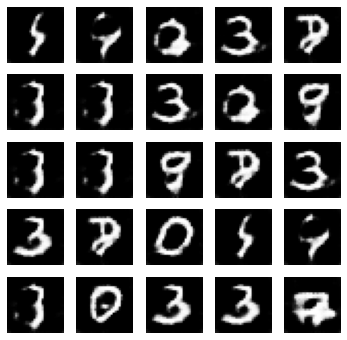

Epoch [7/30] ------------------
[7/30][0/938]	 Loss D: 0.747	 Loss G: 1.866	 D(x): 0.76	 D(G(z)): 0.28/0.24
[7/30][100/938]	 Loss D: 0.768	 Loss G: 1.468	 D(x): 0.90	 D(G(z)): 0.39/0.32
[7/30][200/938]	 Loss D: 0.591	 Loss G: 2.183	 D(x): 0.88	 D(G(z)): 0.29/0.19
[7/30][300/938]	 Loss D: 0.628	 Loss G: 3.110	 D(x): 0.76	 D(G(z)): 0.16/0.12
[7/30][400/938]	 Loss D: 0.526	 Loss G: 2.746	 D(x): 0.72	 D(G(z)): 0.10/0.11
[7/30][500/938]	 Loss D: 0.974	 Loss G: 2.201	 D(x): 0.67	 D(G(z)): 0.28/0.22
[7/30][600/938]	 Loss D: 0.486	 Loss G: 2.321	 D(x): 0.88	 D(G(z)): 0.20/0.21
[7/30][700/938]	 Loss D: 0.588	 Loss G: 3.259	 D(x): 0.85	 D(G(z)): 0.19/0.13
[7/30][800/938]	 Loss D: 0.685	 Loss G: 3.141	 D(x): 0.64	 D(G(z)): 0.06/0.08
[7/30][900/938]	 Loss D: 0.281	 Loss G: 2.960	 D(x): 0.93	 D(G(z)): 0.14/0.12


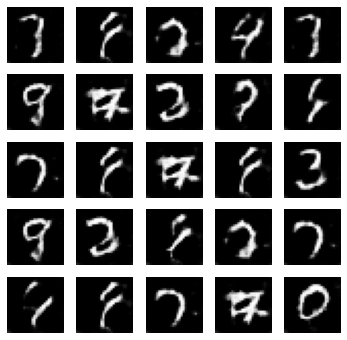

Epoch [8/30] ------------------
[8/30][0/938]	 Loss D: 0.731	 Loss G: 3.961	 D(x): 0.68	 D(G(z)): 0.10/0.06
[8/30][100/938]	 Loss D: 0.541	 Loss G: 2.930	 D(x): 0.75	 D(G(z)): 0.11/0.11
[8/30][200/938]	 Loss D: 1.593	 Loss G: 1.270	 D(x): 0.52	 D(G(z)): 0.40/0.37
[8/30][300/938]	 Loss D: 0.408	 Loss G: 3.777	 D(x): 0.83	 D(G(z)): 0.10/0.11
[8/30][400/938]	 Loss D: 0.623	 Loss G: 2.670	 D(x): 0.75	 D(G(z)): 0.18/0.14
[8/30][500/938]	 Loss D: 1.025	 Loss G: 1.149	 D(x): 0.87	 D(G(z)): 0.50/0.40
[8/30][600/938]	 Loss D: 0.500	 Loss G: 3.621	 D(x): 0.77	 D(G(z)): 0.12/0.08
[8/30][700/938]	 Loss D: 0.517	 Loss G: 1.917	 D(x): 0.88	 D(G(z)): 0.24/0.24
[8/30][800/938]	 Loss D: 0.592	 Loss G: 2.904	 D(x): 0.86	 D(G(z)): 0.22/0.17
[8/30][900/938]	 Loss D: 1.025	 Loss G: 2.606	 D(x): 0.56	 D(G(z)): 0.11/0.12


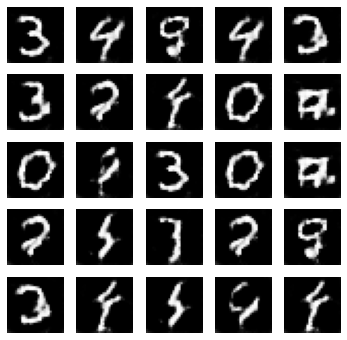

Epoch [9/30] ------------------
[9/30][0/938]	 Loss D: 1.328	 Loss G: 0.977	 D(x): 0.91	 D(G(z)): 0.58/0.49
[9/30][100/938]	 Loss D: 0.897	 Loss G: 1.408	 D(x): 0.76	 D(G(z)): 0.37/0.33
[9/30][200/938]	 Loss D: 0.681	 Loss G: 2.550	 D(x): 0.77	 D(G(z)): 0.23/0.18
[9/30][300/938]	 Loss D: 1.597	 Loss G: 1.308	 D(x): 0.57	 D(G(z)): 0.51/0.35
[9/30][400/938]	 Loss D: 0.819	 Loss G: 2.559	 D(x): 0.71	 D(G(z)): 0.18/0.16
[9/30][500/938]	 Loss D: 0.309	 Loss G: 3.299	 D(x): 0.86	 D(G(z)): 0.09/0.09
[9/30][600/938]	 Loss D: 1.134	 Loss G: 1.019	 D(x): 0.69	 D(G(z)): 0.42/0.46
[9/30][700/938]	 Loss D: 0.768	 Loss G: 1.830	 D(x): 0.93	 D(G(z)): 0.40/0.26
[9/30][800/938]	 Loss D: 1.115	 Loss G: 1.136	 D(x): 0.70	 D(G(z)): 0.39/0.41
[9/30][900/938]	 Loss D: 0.824	 Loss G: 2.148	 D(x): 0.68	 D(G(z)): 0.21/0.24


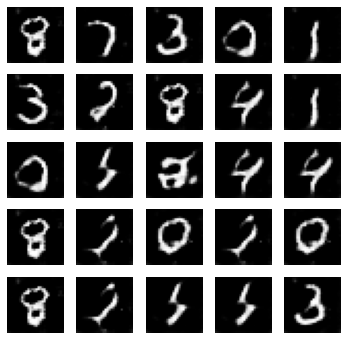

Epoch [10/30] ------------------
[10/30][0/938]	 Loss D: 0.860	 Loss G: 1.884	 D(x): 0.68	 D(G(z)): 0.25/0.24
[10/30][100/938]	 Loss D: 1.023	 Loss G: 2.172	 D(x): 0.70	 D(G(z)): 0.33/0.23
[10/30][200/938]	 Loss D: 0.907	 Loss G: 2.049	 D(x): 0.72	 D(G(z)): 0.27/0.27
[10/30][300/938]	 Loss D: 0.942	 Loss G: 1.779	 D(x): 0.71	 D(G(z)): 0.34/0.26
[10/30][400/938]	 Loss D: 1.869	 Loss G: 1.884	 D(x): 0.44	 D(G(z)): 0.45/0.30
[10/30][500/938]	 Loss D: 0.930	 Loss G: 1.820	 D(x): 0.78	 D(G(z)): 0.37/0.25
[10/30][600/938]	 Loss D: 1.739	 Loss G: 0.640	 D(x): 0.81	 D(G(z)): 0.68/0.60
[10/30][700/938]	 Loss D: 1.597	 Loss G: 1.075	 D(x): 0.56	 D(G(z)): 0.40/0.48
[10/30][800/938]	 Loss D: 1.084	 Loss G: 1.525	 D(x): 0.78	 D(G(z)): 0.42/0.35
[10/30][900/938]	 Loss D: 0.617	 Loss G: 2.272	 D(x): 0.78	 D(G(z)): 0.21/0.19


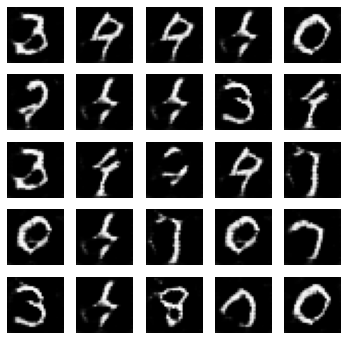

Epoch [11/30] ------------------
[11/30][0/938]	 Loss D: 1.235	 Loss G: 2.277	 D(x): 0.61	 D(G(z)): 0.28/0.25
[11/30][100/938]	 Loss D: 0.739	 Loss G: 1.926	 D(x): 0.80	 D(G(z)): 0.28/0.24
[11/30][200/938]	 Loss D: 1.023	 Loss G: 1.437	 D(x): 0.76	 D(G(z)): 0.41/0.35
[11/30][300/938]	 Loss D: 0.661	 Loss G: 2.151	 D(x): 0.80	 D(G(z)): 0.26/0.21
[11/30][400/938]	 Loss D: 1.063	 Loss G: 1.493	 D(x): 0.66	 D(G(z)): 0.31/0.30
[11/30][500/938]	 Loss D: 1.101	 Loss G: 1.191	 D(x): 0.80	 D(G(z)): 0.46/0.42
[11/30][600/938]	 Loss D: 0.962	 Loss G: 1.907	 D(x): 0.67	 D(G(z)): 0.30/0.23
[11/30][700/938]	 Loss D: 0.923	 Loss G: 1.744	 D(x): 0.69	 D(G(z)): 0.30/0.29
[11/30][800/938]	 Loss D: 0.786	 Loss G: 1.714	 D(x): 0.71	 D(G(z)): 0.23/0.26
[11/30][900/938]	 Loss D: 0.883	 Loss G: 1.822	 D(x): 0.65	 D(G(z)): 0.23/0.22


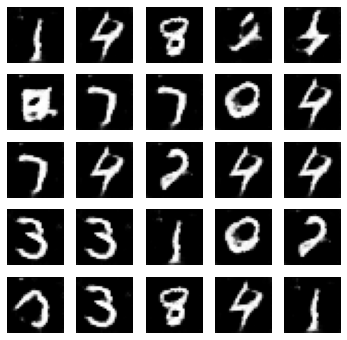

Epoch [12/30] ------------------
[12/30][0/938]	 Loss D: 0.985	 Loss G: 1.233	 D(x): 0.81	 D(G(z)): 0.43/0.39
[12/30][100/938]	 Loss D: 1.128	 Loss G: 1.313	 D(x): 0.67	 D(G(z)): 0.40/0.35
[12/30][200/938]	 Loss D: 0.651	 Loss G: 2.003	 D(x): 0.85	 D(G(z)): 0.26/0.24
[12/30][300/938]	 Loss D: 1.253	 Loss G: 1.397	 D(x): 0.87	 D(G(z)): 0.57/0.33
[12/30][400/938]	 Loss D: 1.337	 Loss G: 1.449	 D(x): 0.72	 D(G(z)): 0.48/0.38
[12/30][500/938]	 Loss D: 1.546	 Loss G: 1.473	 D(x): 0.65	 D(G(z)): 0.51/0.35
[12/30][600/938]	 Loss D: 1.142	 Loss G: 1.987	 D(x): 0.58	 D(G(z)): 0.21/0.26
[12/30][700/938]	 Loss D: 0.867	 Loss G: 2.237	 D(x): 0.77	 D(G(z)): 0.32/0.23
[12/30][800/938]	 Loss D: 0.678	 Loss G: 2.541	 D(x): 0.82	 D(G(z)): 0.22/0.19
[12/30][900/938]	 Loss D: 0.765	 Loss G: 2.166	 D(x): 0.88	 D(G(z)): 0.31/0.23


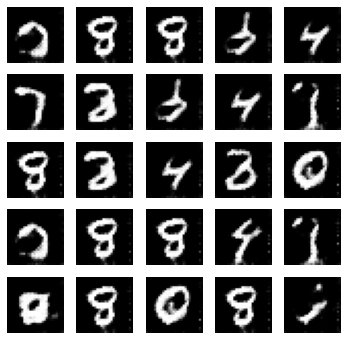

Epoch [13/30] ------------------
[13/30][0/938]	 Loss D: 1.018	 Loss G: 1.769	 D(x): 0.80	 D(G(z)): 0.38/0.30
[13/30][100/938]	 Loss D: 1.230	 Loss G: 1.432	 D(x): 0.70	 D(G(z)): 0.41/0.36
[13/30][200/938]	 Loss D: 1.051	 Loss G: 1.507	 D(x): 0.72	 D(G(z)): 0.39/0.32
[13/30][300/938]	 Loss D: 0.735	 Loss G: 1.795	 D(x): 0.85	 D(G(z)): 0.33/0.28
[13/30][400/938]	 Loss D: 1.685	 Loss G: 0.900	 D(x): 0.64	 D(G(z)): 0.55/0.48
[13/30][500/938]	 Loss D: 1.061	 Loss G: 1.557	 D(x): 0.57	 D(G(z)): 0.25/0.29
[13/30][600/938]	 Loss D: 1.639	 Loss G: 1.158	 D(x): 0.52	 D(G(z)): 0.47/0.40
[13/30][700/938]	 Loss D: 1.119	 Loss G: 1.567	 D(x): 0.62	 D(G(z)): 0.32/0.30
[13/30][800/938]	 Loss D: 0.887	 Loss G: 2.292	 D(x): 0.66	 D(G(z)): 0.21/0.19
[13/30][900/938]	 Loss D: 0.991	 Loss G: 1.684	 D(x): 0.57	 D(G(z)): 0.21/0.24


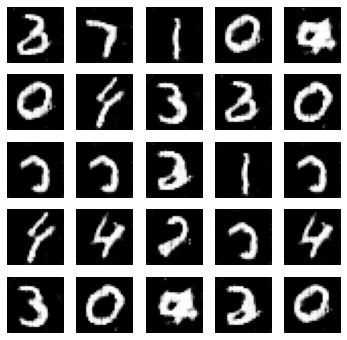

Epoch [14/30] ------------------
[14/30][0/938]	 Loss D: 1.282	 Loss G: 1.359	 D(x): 0.63	 D(G(z)): 0.40/0.36
[14/30][100/938]	 Loss D: 1.066	 Loss G: 1.690	 D(x): 0.68	 D(G(z)): 0.37/0.27
[14/30][200/938]	 Loss D: 1.129	 Loss G: 1.828	 D(x): 0.63	 D(G(z)): 0.30/0.26
[14/30][300/938]	 Loss D: 0.676	 Loss G: 2.041	 D(x): 0.76	 D(G(z)): 0.22/0.22
[14/30][400/938]	 Loss D: 0.945	 Loss G: 2.326	 D(x): 0.61	 D(G(z)): 0.17/0.17
[14/30][500/938]	 Loss D: 1.306	 Loss G: 1.602	 D(x): 0.56	 D(G(z)): 0.34/0.29
[14/30][600/938]	 Loss D: 1.013	 Loss G: 1.710	 D(x): 0.67	 D(G(z)): 0.29/0.27
[14/30][700/938]	 Loss D: 0.912	 Loss G: 1.897	 D(x): 0.67	 D(G(z)): 0.26/0.25
[14/30][800/938]	 Loss D: 0.952	 Loss G: 1.727	 D(x): 0.70	 D(G(z)): 0.31/0.27
[14/30][900/938]	 Loss D: 0.931	 Loss G: 1.829	 D(x): 0.64	 D(G(z)): 0.24/0.24


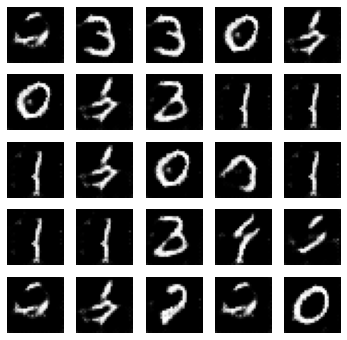

Epoch [15/30] ------------------
[15/30][0/938]	 Loss D: 1.306	 Loss G: 1.127	 D(x): 0.64	 D(G(z)): 0.40/0.43
[15/30][100/938]	 Loss D: 1.241	 Loss G: 1.312	 D(x): 0.64	 D(G(z)): 0.42/0.37
[15/30][200/938]	 Loss D: 0.990	 Loss G: 1.475	 D(x): 0.66	 D(G(z)): 0.34/0.29
[15/30][300/938]	 Loss D: 1.647	 Loss G: 1.486	 D(x): 0.55	 D(G(z)): 0.45/0.37
[15/30][400/938]	 Loss D: 1.045	 Loss G: 1.647	 D(x): 0.65	 D(G(z)): 0.32/0.29
[15/30][500/938]	 Loss D: 1.288	 Loss G: 1.181	 D(x): 0.72	 D(G(z)): 0.46/0.41
[15/30][600/938]	 Loss D: 0.811	 Loss G: 2.324	 D(x): 0.73	 D(G(z)): 0.26/0.18
[15/30][700/938]	 Loss D: 0.636	 Loss G: 2.495	 D(x): 0.74	 D(G(z)): 0.22/0.13
[15/30][800/938]	 Loss D: 1.228	 Loss G: 0.928	 D(x): 0.80	 D(G(z)): 0.55/0.46
[15/30][900/938]	 Loss D: 0.843	 Loss G: 1.570	 D(x): 0.76	 D(G(z)): 0.35/0.29


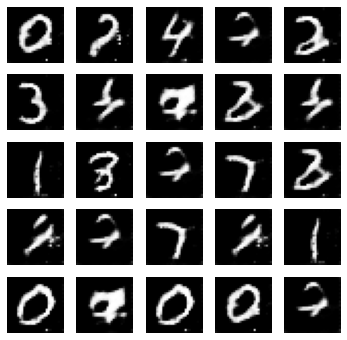

Epoch [16/30] ------------------
[16/30][0/938]	 Loss D: 1.408	 Loss G: 1.237	 D(x): 0.56	 D(G(z)): 0.38/0.39
[16/30][100/938]	 Loss D: 0.915	 Loss G: 1.439	 D(x): 0.78	 D(G(z)): 0.39/0.34
[16/30][200/938]	 Loss D: 1.020	 Loss G: 1.273	 D(x): 0.67	 D(G(z)): 0.37/0.38
[16/30][300/938]	 Loss D: 0.927	 Loss G: 1.637	 D(x): 0.69	 D(G(z)): 0.32/0.28
[16/30][400/938]	 Loss D: 1.163	 Loss G: 1.526	 D(x): 0.62	 D(G(z)): 0.37/0.30
[16/30][500/938]	 Loss D: 0.984	 Loss G: 1.567	 D(x): 0.59	 D(G(z)): 0.27/0.27
[16/30][600/938]	 Loss D: 1.096	 Loss G: 1.589	 D(x): 0.63	 D(G(z)): 0.34/0.27
[16/30][700/938]	 Loss D: 1.153	 Loss G: 1.305	 D(x): 0.61	 D(G(z)): 0.37/0.34
[16/30][800/938]	 Loss D: 0.946	 Loss G: 2.124	 D(x): 0.65	 D(G(z)): 0.30/0.19
[16/30][900/938]	 Loss D: 0.661	 Loss G: 2.032	 D(x): 0.78	 D(G(z)): 0.27/0.20


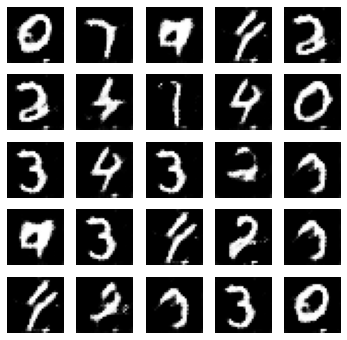

Epoch [17/30] ------------------
[17/30][0/938]	 Loss D: 0.934	 Loss G: 2.078	 D(x): 0.63	 D(G(z)): 0.23/0.21
[17/30][100/938]	 Loss D: 1.072	 Loss G: 1.658	 D(x): 0.59	 D(G(z)): 0.29/0.28
[17/30][200/938]	 Loss D: 1.074	 Loss G: 1.632	 D(x): 0.63	 D(G(z)): 0.33/0.28
[17/30][300/938]	 Loss D: 0.985	 Loss G: 1.689	 D(x): 0.65	 D(G(z)): 0.31/0.28
[17/30][400/938]	 Loss D: 1.283	 Loss G: 1.046	 D(x): 0.66	 D(G(z)): 0.49/0.43
[17/30][500/938]	 Loss D: 1.163	 Loss G: 1.275	 D(x): 0.60	 D(G(z)): 0.35/0.37
[17/30][600/938]	 Loss D: 0.882	 Loss G: 1.597	 D(x): 0.66	 D(G(z)): 0.28/0.26
[17/30][700/938]	 Loss D: 1.182	 Loss G: 1.304	 D(x): 0.71	 D(G(z)): 0.39/0.38
[17/30][800/938]	 Loss D: 0.870	 Loss G: 1.797	 D(x): 0.68	 D(G(z)): 0.28/0.25
[17/30][900/938]	 Loss D: 1.126	 Loss G: 1.415	 D(x): 0.74	 D(G(z)): 0.41/0.38


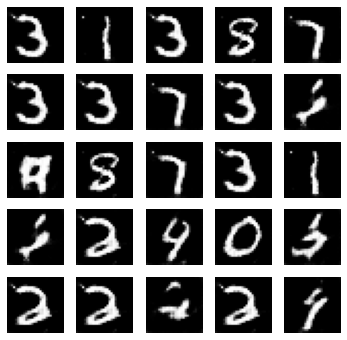

Epoch [18/30] ------------------
[18/30][0/938]	 Loss D: 1.203	 Loss G: 1.638	 D(x): 0.58	 D(G(z)): 0.34/0.26
[18/30][100/938]	 Loss D: 1.000	 Loss G: 1.595	 D(x): 0.66	 D(G(z)): 0.34/0.30
[18/30][200/938]	 Loss D: 0.918	 Loss G: 1.906	 D(x): 0.67	 D(G(z)): 0.29/0.23
[18/30][300/938]	 Loss D: 0.712	 Loss G: 1.717	 D(x): 0.75	 D(G(z)): 0.27/0.25
[18/30][400/938]	 Loss D: 0.775	 Loss G: 1.817	 D(x): 0.76	 D(G(z)): 0.30/0.25
[18/30][500/938]	 Loss D: 1.075	 Loss G: 1.772	 D(x): 0.64	 D(G(z)): 0.26/0.25
[18/30][600/938]	 Loss D: 1.602	 Loss G: 1.158	 D(x): 0.64	 D(G(z)): 0.56/0.41
[18/30][700/938]	 Loss D: 1.099	 Loss G: 1.302	 D(x): 0.73	 D(G(z)): 0.44/0.34
[18/30][800/938]	 Loss D: 0.854	 Loss G: 1.540	 D(x): 0.67	 D(G(z)): 0.29/0.27
[18/30][900/938]	 Loss D: 1.695	 Loss G: 1.038	 D(x): 0.62	 D(G(z)): 0.59/0.41


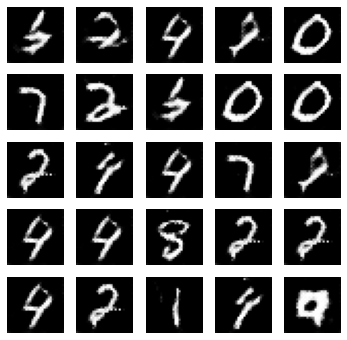

Epoch [19/30] ------------------
[19/30][0/938]	 Loss D: 0.833	 Loss G: 1.635	 D(x): 0.70	 D(G(z)): 0.27/0.26
[19/30][100/938]	 Loss D: 0.755	 Loss G: 1.756	 D(x): 0.75	 D(G(z)): 0.30/0.24
[19/30][200/938]	 Loss D: 0.923	 Loss G: 1.508	 D(x): 0.62	 D(G(z)): 0.26/0.30
[19/30][300/938]	 Loss D: 1.202	 Loss G: 1.505	 D(x): 0.62	 D(G(z)): 0.38/0.33
[19/30][400/938]	 Loss D: 1.623	 Loss G: 1.851	 D(x): 0.36	 D(G(z)): 0.23/0.25
[19/30][500/938]	 Loss D: 0.824	 Loss G: 1.672	 D(x): 0.68	 D(G(z)): 0.26/0.25
[19/30][600/938]	 Loss D: 1.270	 Loss G: 0.906	 D(x): 0.60	 D(G(z)): 0.43/0.47
[19/30][700/938]	 Loss D: 1.284	 Loss G: 1.843	 D(x): 0.51	 D(G(z)): 0.27/0.25
[19/30][800/938]	 Loss D: 1.399	 Loss G: 1.654	 D(x): 0.48	 D(G(z)): 0.30/0.25
[19/30][900/938]	 Loss D: 1.479	 Loss G: 1.005	 D(x): 0.48	 D(G(z)): 0.39/0.44


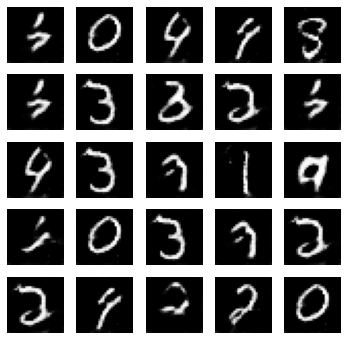

Epoch [20/30] ------------------
[20/30][0/938]	 Loss D: 1.117	 Loss G: 1.354	 D(x): 0.62	 D(G(z)): 0.35/0.33
[20/30][100/938]	 Loss D: 1.326	 Loss G: 1.468	 D(x): 0.53	 D(G(z)): 0.33/0.32
[20/30][200/938]	 Loss D: 1.145	 Loss G: 1.610	 D(x): 0.57	 D(G(z)): 0.32/0.28
[20/30][300/938]	 Loss D: 0.996	 Loss G: 1.114	 D(x): 0.75	 D(G(z)): 0.43/0.40
[20/30][400/938]	 Loss D: 1.452	 Loss G: 1.094	 D(x): 0.51	 D(G(z)): 0.42/0.40
[20/30][500/938]	 Loss D: 1.305	 Loss G: 1.130	 D(x): 0.59	 D(G(z)): 0.43/0.38
[20/30][600/938]	 Loss D: 1.356	 Loss G: 0.862	 D(x): 0.62	 D(G(z)): 0.49/0.48
[20/30][700/938]	 Loss D: 1.028	 Loss G: 1.555	 D(x): 0.60	 D(G(z)): 0.31/0.27
[20/30][800/938]	 Loss D: 1.151	 Loss G: 1.300	 D(x): 0.56	 D(G(z)): 0.33/0.34
[20/30][900/938]	 Loss D: 1.044	 Loss G: 1.592	 D(x): 0.60	 D(G(z)): 0.32/0.29


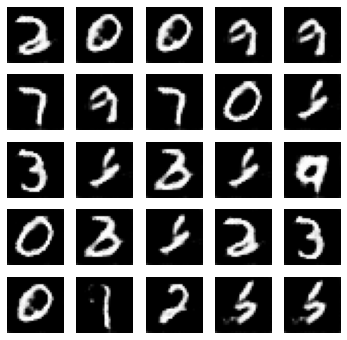

Epoch [21/30] ------------------
[21/30][0/938]	 Loss D: 1.192	 Loss G: 0.937	 D(x): 0.68	 D(G(z)): 0.48/0.44
[21/30][100/938]	 Loss D: 0.768	 Loss G: 1.844	 D(x): 0.65	 D(G(z)): 0.21/0.20
[21/30][200/938]	 Loss D: 1.053	 Loss G: 1.718	 D(x): 0.61	 D(G(z)): 0.32/0.26
[21/30][300/938]	 Loss D: 1.387	 Loss G: 0.849	 D(x): 0.68	 D(G(z)): 0.55/0.49
[21/30][400/938]	 Loss D: 1.095	 Loss G: 1.195	 D(x): 0.62	 D(G(z)): 0.38/0.37
[21/30][500/938]	 Loss D: 1.703	 Loss G: 1.173	 D(x): 0.41	 D(G(z)): 0.39/0.38
[21/30][600/938]	 Loss D: 0.948	 Loss G: 1.353	 D(x): 0.69	 D(G(z)): 0.37/0.32
[21/30][700/938]	 Loss D: 1.189	 Loss G: 1.152	 D(x): 0.68	 D(G(z)): 0.45/0.40
[21/30][800/938]	 Loss D: 1.100	 Loss G: 1.110	 D(x): 0.71	 D(G(z)): 0.46/0.41
[21/30][900/938]	 Loss D: 1.221	 Loss G: 1.755	 D(x): 0.46	 D(G(z)): 0.23/0.24


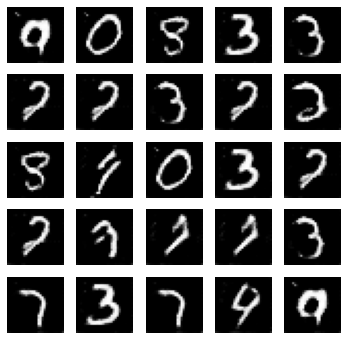

Epoch [22/30] ------------------
[22/30][0/938]	 Loss D: 1.204	 Loss G: 1.118	 D(x): 0.63	 D(G(z)): 0.41/0.41
[22/30][100/938]	 Loss D: 1.095	 Loss G: 1.477	 D(x): 0.64	 D(G(z)): 0.35/0.31
[22/30][200/938]	 Loss D: 1.152	 Loss G: 1.299	 D(x): 0.74	 D(G(z)): 0.46/0.36
[22/30][300/938]	 Loss D: 1.403	 Loss G: 1.370	 D(x): 0.61	 D(G(z)): 0.46/0.36
[22/30][400/938]	 Loss D: 1.462	 Loss G: 0.866	 D(x): 0.60	 D(G(z)): 0.50/0.49
[22/30][500/938]	 Loss D: 1.436	 Loss G: 1.102	 D(x): 0.62	 D(G(z)): 0.45/0.42
[22/30][600/938]	 Loss D: 1.198	 Loss G: 1.104	 D(x): 0.59	 D(G(z)): 0.40/0.39
[22/30][700/938]	 Loss D: 1.178	 Loss G: 1.189	 D(x): 0.69	 D(G(z)): 0.45/0.39
[22/30][800/938]	 Loss D: 1.148	 Loss G: 1.162	 D(x): 0.63	 D(G(z)): 0.42/0.38
[22/30][900/938]	 Loss D: 1.480	 Loss G: 0.969	 D(x): 0.51	 D(G(z)): 0.45/0.44


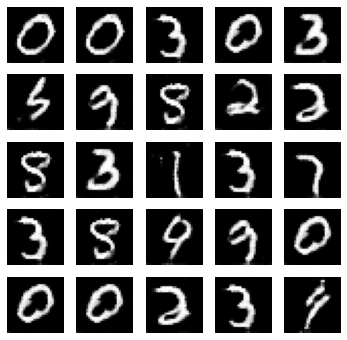

Epoch [23/30] ------------------
[23/30][0/938]	 Loss D: 0.992	 Loss G: 1.293	 D(x): 0.67	 D(G(z)): 0.35/0.35
[23/30][100/938]	 Loss D: 1.088	 Loss G: 1.377	 D(x): 0.68	 D(G(z)): 0.42/0.34
[23/30][200/938]	 Loss D: 1.305	 Loss G: 1.269	 D(x): 0.60	 D(G(z)): 0.42/0.36
[23/30][300/938]	 Loss D: 1.263	 Loss G: 1.004	 D(x): 0.58	 D(G(z)): 0.39/0.44
[23/30][400/938]	 Loss D: 1.461	 Loss G: 0.957	 D(x): 0.52	 D(G(z)): 0.46/0.44
[23/30][500/938]	 Loss D: 1.148	 Loss G: 1.432	 D(x): 0.55	 D(G(z)): 0.30/0.30
[23/30][600/938]	 Loss D: 1.075	 Loss G: 1.545	 D(x): 0.59	 D(G(z)): 0.32/0.29
[23/30][700/938]	 Loss D: 1.271	 Loss G: 0.969	 D(x): 0.57	 D(G(z)): 0.41/0.43
[23/30][800/938]	 Loss D: 0.987	 Loss G: 1.314	 D(x): 0.62	 D(G(z)): 0.32/0.32
[23/30][900/938]	 Loss D: 1.127	 Loss G: 1.094	 D(x): 0.64	 D(G(z)): 0.41/0.40


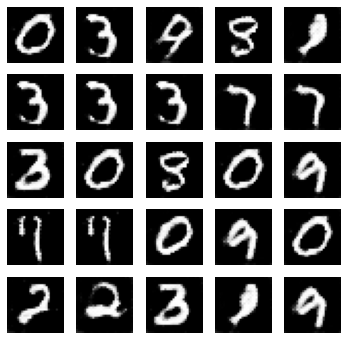

Epoch [24/30] ------------------
[24/30][0/938]	 Loss D: 1.544	 Loss G: 0.852	 D(x): 0.58	 D(G(z)): 0.51/0.51
[24/30][100/938]	 Loss D: 0.956	 Loss G: 1.731	 D(x): 0.65	 D(G(z)): 0.30/0.24
[24/30][200/938]	 Loss D: 1.228	 Loss G: 1.461	 D(x): 0.60	 D(G(z)): 0.39/0.32
[24/30][300/938]	 Loss D: 1.295	 Loss G: 1.277	 D(x): 0.59	 D(G(z)): 0.41/0.37
[24/30][400/938]	 Loss D: 1.098	 Loss G: 1.395	 D(x): 0.63	 D(G(z)): 0.36/0.32
[24/30][500/938]	 Loss D: 1.350	 Loss G: 0.938	 D(x): 0.59	 D(G(z)): 0.44/0.44
[24/30][600/938]	 Loss D: 1.156	 Loss G: 1.132	 D(x): 0.70	 D(G(z)): 0.44/0.40
[24/30][700/938]	 Loss D: 1.208	 Loss G: 1.388	 D(x): 0.56	 D(G(z)): 0.33/0.33
[24/30][800/938]	 Loss D: 1.179	 Loss G: 1.110	 D(x): 0.75	 D(G(z)): 0.51/0.40
[24/30][900/938]	 Loss D: 0.926	 Loss G: 1.416	 D(x): 0.78	 D(G(z)): 0.39/0.35


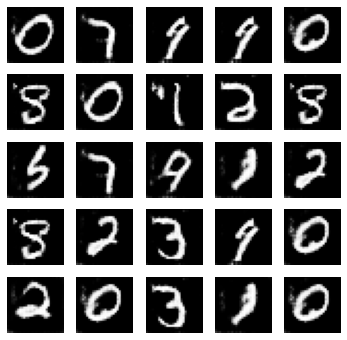

Epoch [25/30] ------------------
[25/30][0/938]	 Loss D: 1.541	 Loss G: 1.169	 D(x): 0.48	 D(G(z)): 0.41/0.40
[25/30][100/938]	 Loss D: 1.077	 Loss G: 1.463	 D(x): 0.59	 D(G(z)): 0.33/0.34
[25/30][200/938]	 Loss D: 1.063	 Loss G: 1.317	 D(x): 0.66	 D(G(z)): 0.38/0.34
[25/30][300/938]	 Loss D: 1.327	 Loss G: 1.625	 D(x): 0.46	 D(G(z)): 0.27/0.27
[25/30][400/938]	 Loss D: 1.125	 Loss G: 1.210	 D(x): 0.56	 D(G(z)): 0.33/0.34
[25/30][500/938]	 Loss D: 1.476	 Loss G: 1.062	 D(x): 0.50	 D(G(z)): 0.40/0.42
[25/30][600/938]	 Loss D: 1.123	 Loss G: 1.172	 D(x): 0.61	 D(G(z)): 0.39/0.37
[25/30][700/938]	 Loss D: 1.746	 Loss G: 1.142	 D(x): 0.44	 D(G(z)): 0.46/0.39
[25/30][800/938]	 Loss D: 1.266	 Loss G: 1.025	 D(x): 0.61	 D(G(z)): 0.45/0.43
[25/30][900/938]	 Loss D: 1.403	 Loss G: 0.949	 D(x): 0.53	 D(G(z)): 0.44/0.45


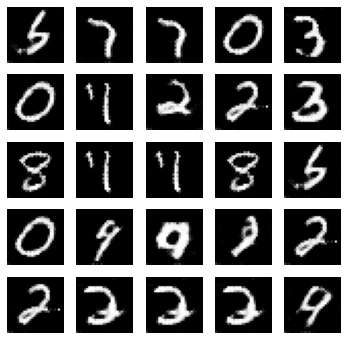

Epoch [26/30] ------------------
[26/30][0/938]	 Loss D: 0.817	 Loss G: 1.521	 D(x): 0.67	 D(G(z)): 0.27/0.27
[26/30][100/938]	 Loss D: 1.108	 Loss G: 1.289	 D(x): 0.62	 D(G(z)): 0.36/0.35
[26/30][200/938]	 Loss D: 0.931	 Loss G: 1.256	 D(x): 0.68	 D(G(z)): 0.37/0.34
[26/30][300/938]	 Loss D: 0.961	 Loss G: 1.273	 D(x): 0.64	 D(G(z)): 0.33/0.35
[26/30][400/938]	 Loss D: 0.927	 Loss G: 1.186	 D(x): 0.74	 D(G(z)): 0.41/0.36
[26/30][500/938]	 Loss D: 1.301	 Loss G: 1.115	 D(x): 0.63	 D(G(z)): 0.48/0.40
[26/30][600/938]	 Loss D: 1.023	 Loss G: 1.282	 D(x): 0.63	 D(G(z)): 0.34/0.32
[26/30][700/938]	 Loss D: 1.084	 Loss G: 1.143	 D(x): 0.68	 D(G(z)): 0.41/0.38
[26/30][800/938]	 Loss D: 1.626	 Loss G: 1.033	 D(x): 0.48	 D(G(z)): 0.47/0.41
[26/30][900/938]	 Loss D: 1.443	 Loss G: 1.073	 D(x): 0.50	 D(G(z)): 0.41/0.40


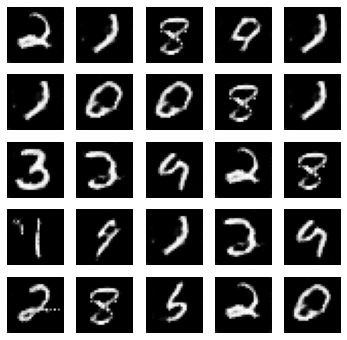

Epoch [27/30] ------------------
[27/30][0/938]	 Loss D: 0.902	 Loss G: 1.397	 D(x): 0.69	 D(G(z)): 0.33/0.31
[27/30][100/938]	 Loss D: 1.505	 Loss G: 0.999	 D(x): 0.52	 D(G(z)): 0.47/0.42
[27/30][200/938]	 Loss D: 1.198	 Loss G: 1.183	 D(x): 0.61	 D(G(z)): 0.41/0.38
[27/30][300/938]	 Loss D: 1.341	 Loss G: 1.107	 D(x): 0.54	 D(G(z)): 0.43/0.38
[27/30][400/938]	 Loss D: 1.246	 Loss G: 1.200	 D(x): 0.57	 D(G(z)): 0.38/0.36
[27/30][500/938]	 Loss D: 1.194	 Loss G: 1.288	 D(x): 0.72	 D(G(z)): 0.44/0.40
[27/30][600/938]	 Loss D: 1.242	 Loss G: 1.213	 D(x): 0.59	 D(G(z)): 0.41/0.36
[27/30][700/938]	 Loss D: 1.378	 Loss G: 1.200	 D(x): 0.47	 D(G(z)): 0.36/0.37
[27/30][800/938]	 Loss D: 1.597	 Loss G: 1.050	 D(x): 0.52	 D(G(z)): 0.49/0.40
[27/30][900/938]	 Loss D: 1.128	 Loss G: 1.424	 D(x): 0.55	 D(G(z)): 0.32/0.30


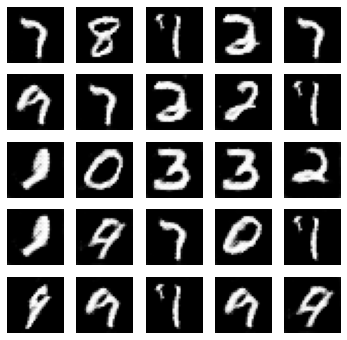

Epoch [28/30] ------------------
[28/30][0/938]	 Loss D: 1.005	 Loss G: 1.070	 D(x): 0.67	 D(G(z)): 0.39/0.40
[28/30][100/938]	 Loss D: 1.466	 Loss G: 1.419	 D(x): 0.39	 D(G(z)): 0.29/0.29
[28/30][200/938]	 Loss D: 0.782	 Loss G: 1.502	 D(x): 0.78	 D(G(z)): 0.35/0.30
[28/30][300/938]	 Loss D: 1.349	 Loss G: 1.154	 D(x): 0.54	 D(G(z)): 0.41/0.38
[28/30][400/938]	 Loss D: 1.072	 Loss G: 1.395	 D(x): 0.59	 D(G(z)): 0.34/0.30
[28/30][500/938]	 Loss D: 0.943	 Loss G: 1.703	 D(x): 0.64	 D(G(z)): 0.28/0.25
[28/30][600/938]	 Loss D: 1.211	 Loss G: 1.221	 D(x): 0.54	 D(G(z)): 0.36/0.35
[28/30][700/938]	 Loss D: 1.062	 Loss G: 1.256	 D(x): 0.65	 D(G(z)): 0.38/0.35
[28/30][800/938]	 Loss D: 1.609	 Loss G: 0.859	 D(x): 0.44	 D(G(z)): 0.42/0.47
[28/30][900/938]	 Loss D: 1.285	 Loss G: 0.958	 D(x): 0.60	 D(G(z)): 0.43/0.43


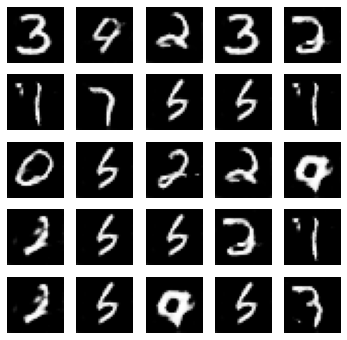

Epoch [29/30] ------------------
[29/30][0/938]	 Loss D: 1.263	 Loss G: 1.182	 D(x): 0.51	 D(G(z)): 0.36/0.37
[29/30][100/938]	 Loss D: 1.078	 Loss G: 1.328	 D(x): 0.57	 D(G(z)): 0.33/0.32
[29/30][200/938]	 Loss D: 1.051	 Loss G: 1.495	 D(x): 0.57	 D(G(z)): 0.30/0.28
[29/30][300/938]	 Loss D: 1.056	 Loss G: 1.604	 D(x): 0.58	 D(G(z)): 0.30/0.26
[29/30][400/938]	 Loss D: 1.072	 Loss G: 1.176	 D(x): 0.71	 D(G(z)): 0.44/0.38
[29/30][500/938]	 Loss D: 1.055	 Loss G: 1.427	 D(x): 0.63	 D(G(z)): 0.36/0.29
[29/30][600/938]	 Loss D: 1.410	 Loss G: 0.972	 D(x): 0.55	 D(G(z)): 0.46/0.44
[29/30][700/938]	 Loss D: 1.416	 Loss G: 1.194	 D(x): 0.58	 D(G(z)): 0.45/0.38
[29/30][800/938]	 Loss D: 1.182	 Loss G: 1.064	 D(x): 0.62	 D(G(z)): 0.40/0.40
[29/30][900/938]	 Loss D: 1.369	 Loss G: 0.945	 D(x): 0.60	 D(G(z)): 0.48/0.44


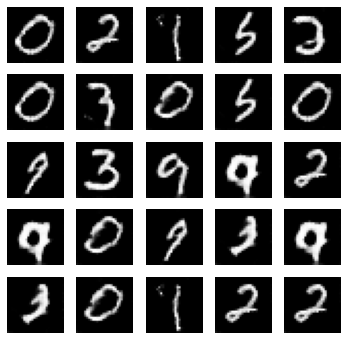

Epoch [30/30] ------------------
[30/30][0/938]	 Loss D: 1.195	 Loss G: 1.103	 D(x): 0.57	 D(G(z)): 0.40/0.38
[30/30][100/938]	 Loss D: 0.968	 Loss G: 1.065	 D(x): 0.70	 D(G(z)): 0.40/0.39
[30/30][200/938]	 Loss D: 0.973	 Loss G: 1.253	 D(x): 0.68	 D(G(z)): 0.39/0.33
[30/30][300/938]	 Loss D: 1.177	 Loss G: 1.116	 D(x): 0.64	 D(G(z)): 0.44/0.39
[30/30][400/938]	 Loss D: 1.117	 Loss G: 1.633	 D(x): 0.65	 D(G(z)): 0.38/0.28
[30/30][500/938]	 Loss D: 1.117	 Loss G: 1.266	 D(x): 0.63	 D(G(z)): 0.41/0.33
[30/30][600/938]	 Loss D: 1.646	 Loss G: 1.050	 D(x): 0.43	 D(G(z)): 0.42/0.40
[30/30][700/938]	 Loss D: 1.080	 Loss G: 1.363	 D(x): 0.54	 D(G(z)): 0.30/0.30
[30/30][800/938]	 Loss D: 1.329	 Loss G: 1.016	 D(x): 0.61	 D(G(z)): 0.46/0.43
[30/30][900/938]	 Loss D: 1.170	 Loss G: 1.182	 D(x): 0.62	 D(G(z)): 0.42/0.38


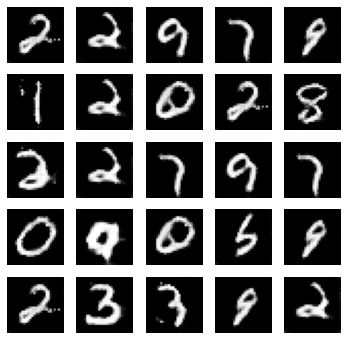

In [6]:
losses_discriminator = []
losses_generator = []

for epoch in range(NB_EPOCHS):
    print(f'Epoch [{epoch+1}/{NB_EPOCHS}] ------------------')
    for batch_idx, data in enumerate(train_dataloader):

        # Generate batch of fake images from noise
        noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)
        fake_images = generator(noise)

        ### DISCRIMINATOR ###

        # Discriminate fake images
        output_0 = discriminator(fake_images.detach()).view(-1)
        discriminator_labels_fake = torch.full_like(output_0, fill_value=fake_label, device=device) # output should be 0 (fake)
        loss_discriminator_fake = criterion(output_0, discriminator_labels_fake)
        # Brackpropagation for discriminator on fake images
        optim_discriminator.zero_grad()
        loss_discriminator_fake.backward()

        # Discriminate real images
        real_images = data[0].to(device)
        output_1 = discriminator(real_images).view(-1)
        discriminator_labels_real = torch.full_like(output_1, fill_value=real_label) # output should be 1 (real)
        loss_discriminator_real = criterion(output_1, discriminator_labels_real)
        # Brackpropagation for discriminator on real images
        loss_discriminator_real.backward() # don't set gradients to zero, accumulate with previous ones

        # Update discriminator
        optim_discriminator.step()


        ### GENERATOR ###

        output_2 = discriminator(fake_images).view(-1)
        generator_labels = torch.full_like(output_2, fill_value=real_label, device=device) # output should be 1 (discriminated as real)
        loss_generator = criterion(output_2, generator_labels)

        # Backpropagation
        optim_generator.zero_grad()
        loss_generator.backward()

        # Update generator
        optim_generator.step()


        ### LOG AND DISPLAY ###
        
        losses_discriminator.append(loss_discriminator_fake.item()+loss_discriminator_real.item())
        losses_generator.append(loss_generator.item())

        if (batch_idx % 100 == 0):
            print('[{}/{}][{}/{}]\t Loss D: {:.3f}\t Loss G: {:.3f}\t D(x): {:.2f}\t D(G(z)): {:.2f}/{:.2f}'.format(epoch+1, NB_EPOCHS, batch_idx, len(train_dataloader),
            losses_discriminator[-1], losses_generator[-1], output_1.mean().item(), output_0.mean().item(), output_2.mean().item()))

    # Plot generated samples
    imgs = generator(fixed_noise).detach().cpu().numpy()
    fig = plt.figure(figsize=(6, 6))
    rows, cols = 5, 5
    for i in range(1, rows*cols+1):
        sample_idx = torch.randint(len(imgs), size=(1,)).item()
        img = imgs[sample_idx]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()
